In [9]:
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp

sys.path.append("/home/sergey/tools/sclitr/")
import sclitr as sl

# Figures aesthetics
sc.set_figure_params(dpi=150)

# Pathes
DATA_PATH = "/home/sergey/data/clonal_project"
HOME_PATH = "/home/sergey/projects/clonal_project"

# Additional functions
exec(open(f"{HOME_PATH}/tools/tools.py").read())
sns.set_style("ticks")

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sc.set_figure_params(dpi=150, dpi_save=300)
sns.set_style("ticks")

In [84]:
clones = sc.read_h5ad("/home/sergey/data/clonal_project/anndatas/perturbations_noEtOH/clone2vec/trunk_clone2vec.h5ad")
adata_m = sc.read_h5ad("/home/sergey/data/clonal_project/anndatas/perturbations_noEtOH/clone2vec/trunk_mesenchyme_merged.h5ad")
adata_n = sc.read_h5ad("/home/sergey/data/clonal_project/anndatas/perturbations_noEtOH/clone2vec/trunk_neurons_merged.h5ad")
adata_n = adata_n[~adata_n.obs.celltype_l2.isin(["Sensory", "Melanocytes"])]

In [85]:
perturbation_colors = {
    "Acvr2a": "#a1b8d4",
    "Acvrl1": "#e68483",
    "Bmpr1a": "#8cc177",
    "Bmpr2": "#73473e",
    "EGFP-1": "#bb2727",
    "EtOH": "#238a56",
    "Fgfr1": "#266296",
    "Fzd2": "#2eaeb7",
    "Fzd4": "#6e4a87",
    "Hhip": "#b08a7f",
    "Lgr4": "#d1d37d",
    "Lrp2": "#b59fc0",
    "Lrp4": "#93cfd3",
    "Ptch1": "#f2ad6a",
    "Tgfbr3": "#eaa8bf",
    "multi_gRNA": "#e26b26",
    "uncertain": "#a4ad55",
    "NA": "#cccccc",
    "multiple": "#cccccc",
}

clones.uns["perturbation_colors"] = [perturbation_colors[i] for i in clones.obs.perturbation.cat.categories]

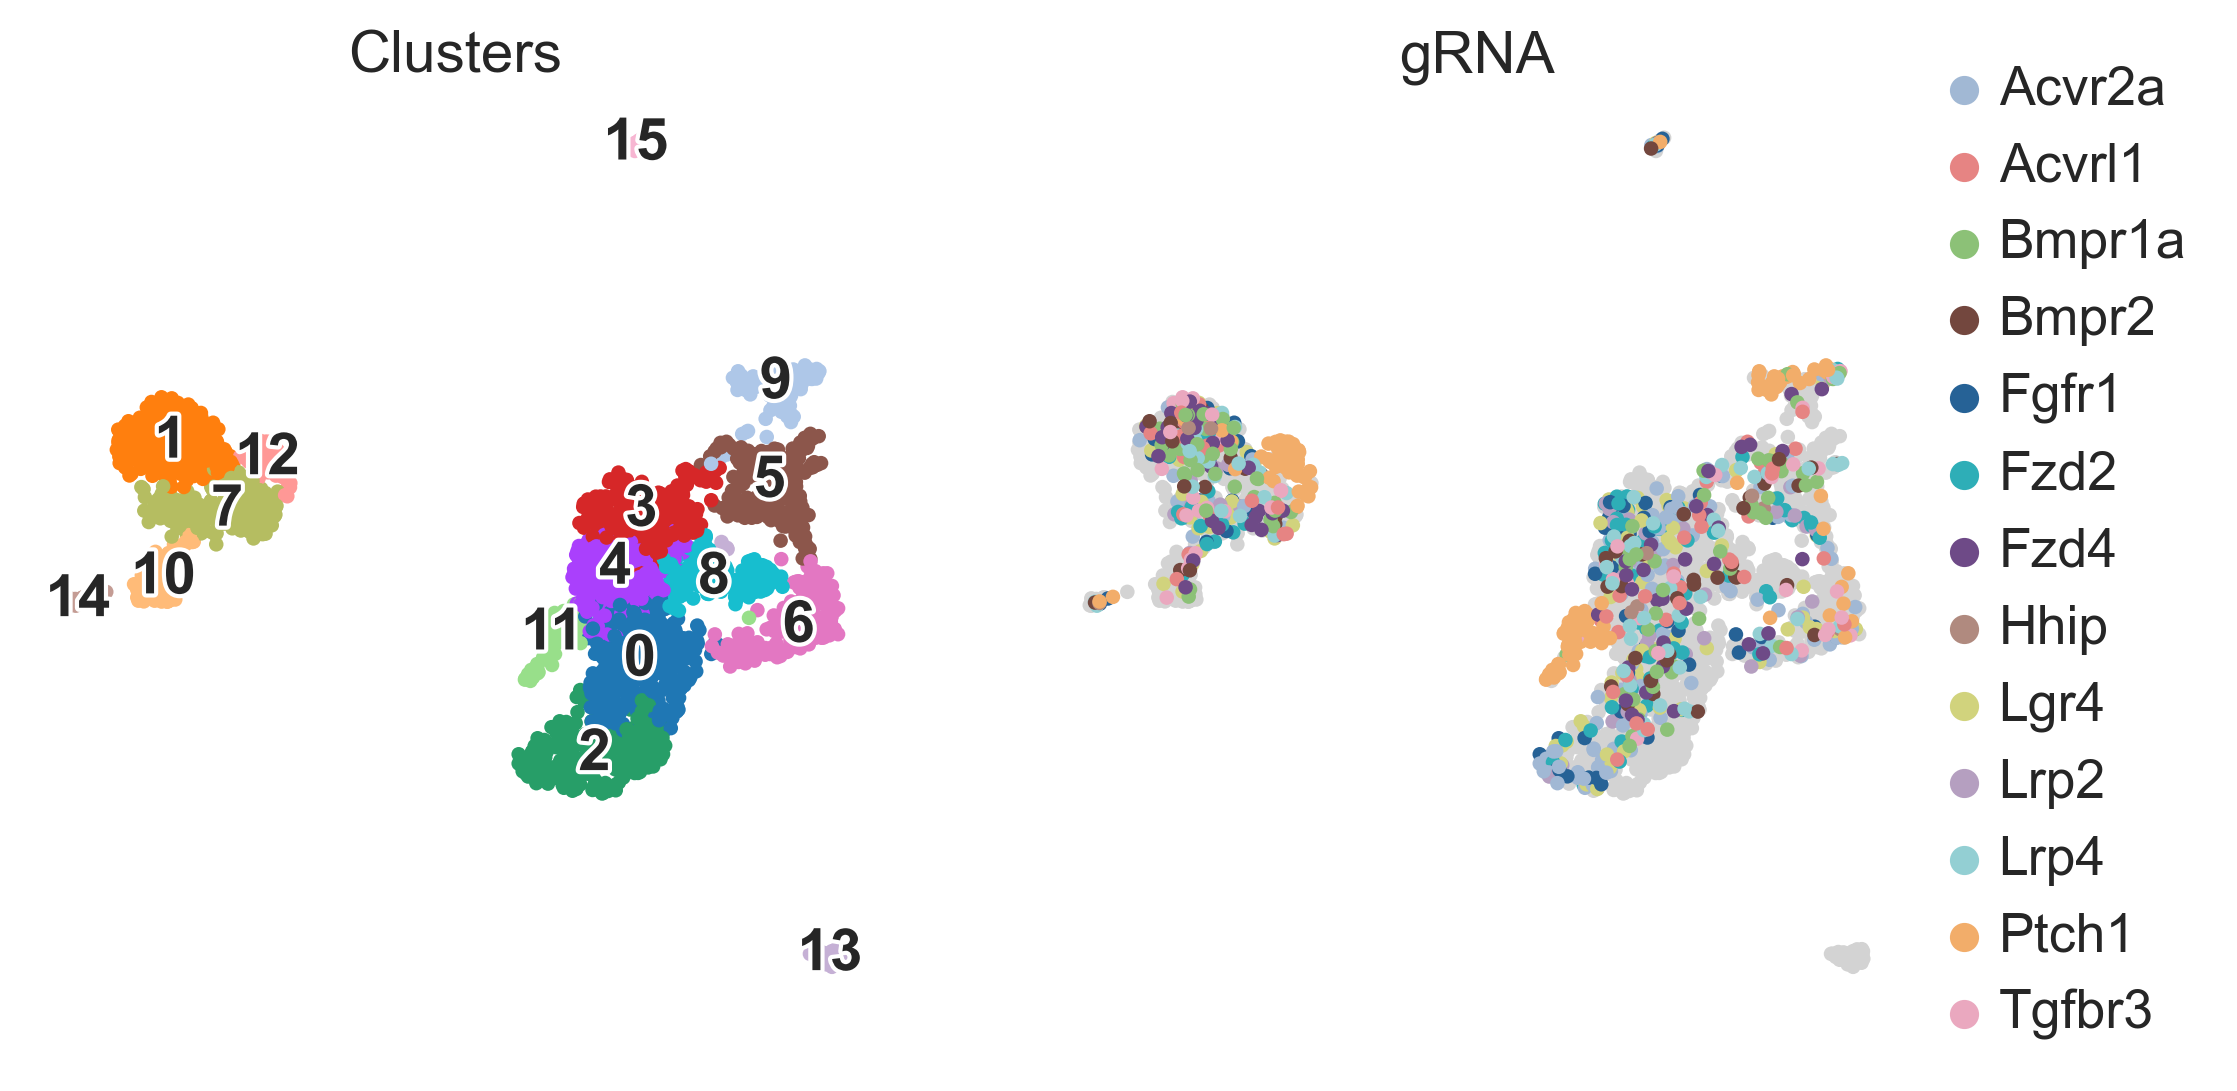

In [86]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

sc.pl.umap(clones, color="leiden_1", legend_loc="on data", frameon=False, legend_fontoutline=2, title="Clusters", ax=axes[0], show=False)

gRNAs = [i for i in set(clones.obs.perturbation) if i not in ["uncertain", "NA", "multi_gRNA", "uncertain", "EGFP-1"]]
sc.pl.umap(clones, color="perturbation", frameon=False, legend_fontoutline=2, title="gRNA", ax=axes[1], show=False, groups=gRNAs, na_in_legend=False)

plt.savefig("figures/UMAPs_trunk.pdf", bbox_inches="tight")

In [105]:
clones.obs["injection"] = pd.Series(clones.obs_names).apply(lambda x: x.split(":")[1]).values
clones_subset = clones[clones.obs.injection == "injection18"].copy()
clones_subset = clones_subset[~clones_subset.obs.perturbation.isin(["NA", "multi_gRNA", "uncertain"])]
leiden_colors = dict(zip(clones.obs.leiden_1.cat.categories, clones.uns["leiden_1_colors"]))

df = clones_subset.obs.groupby(["leiden_1", "perturbation"]).size().unstack()
#df = (df / df.sum(axis=0)).T
df = df.T
df = df.loc[["EGFP-1", "Acvrl1", "Bmpr1a", "Bmpr2", "Fzd4", "Hhip", "Lrp4", "Tgfbr3", "Ptch1"][::-1]]

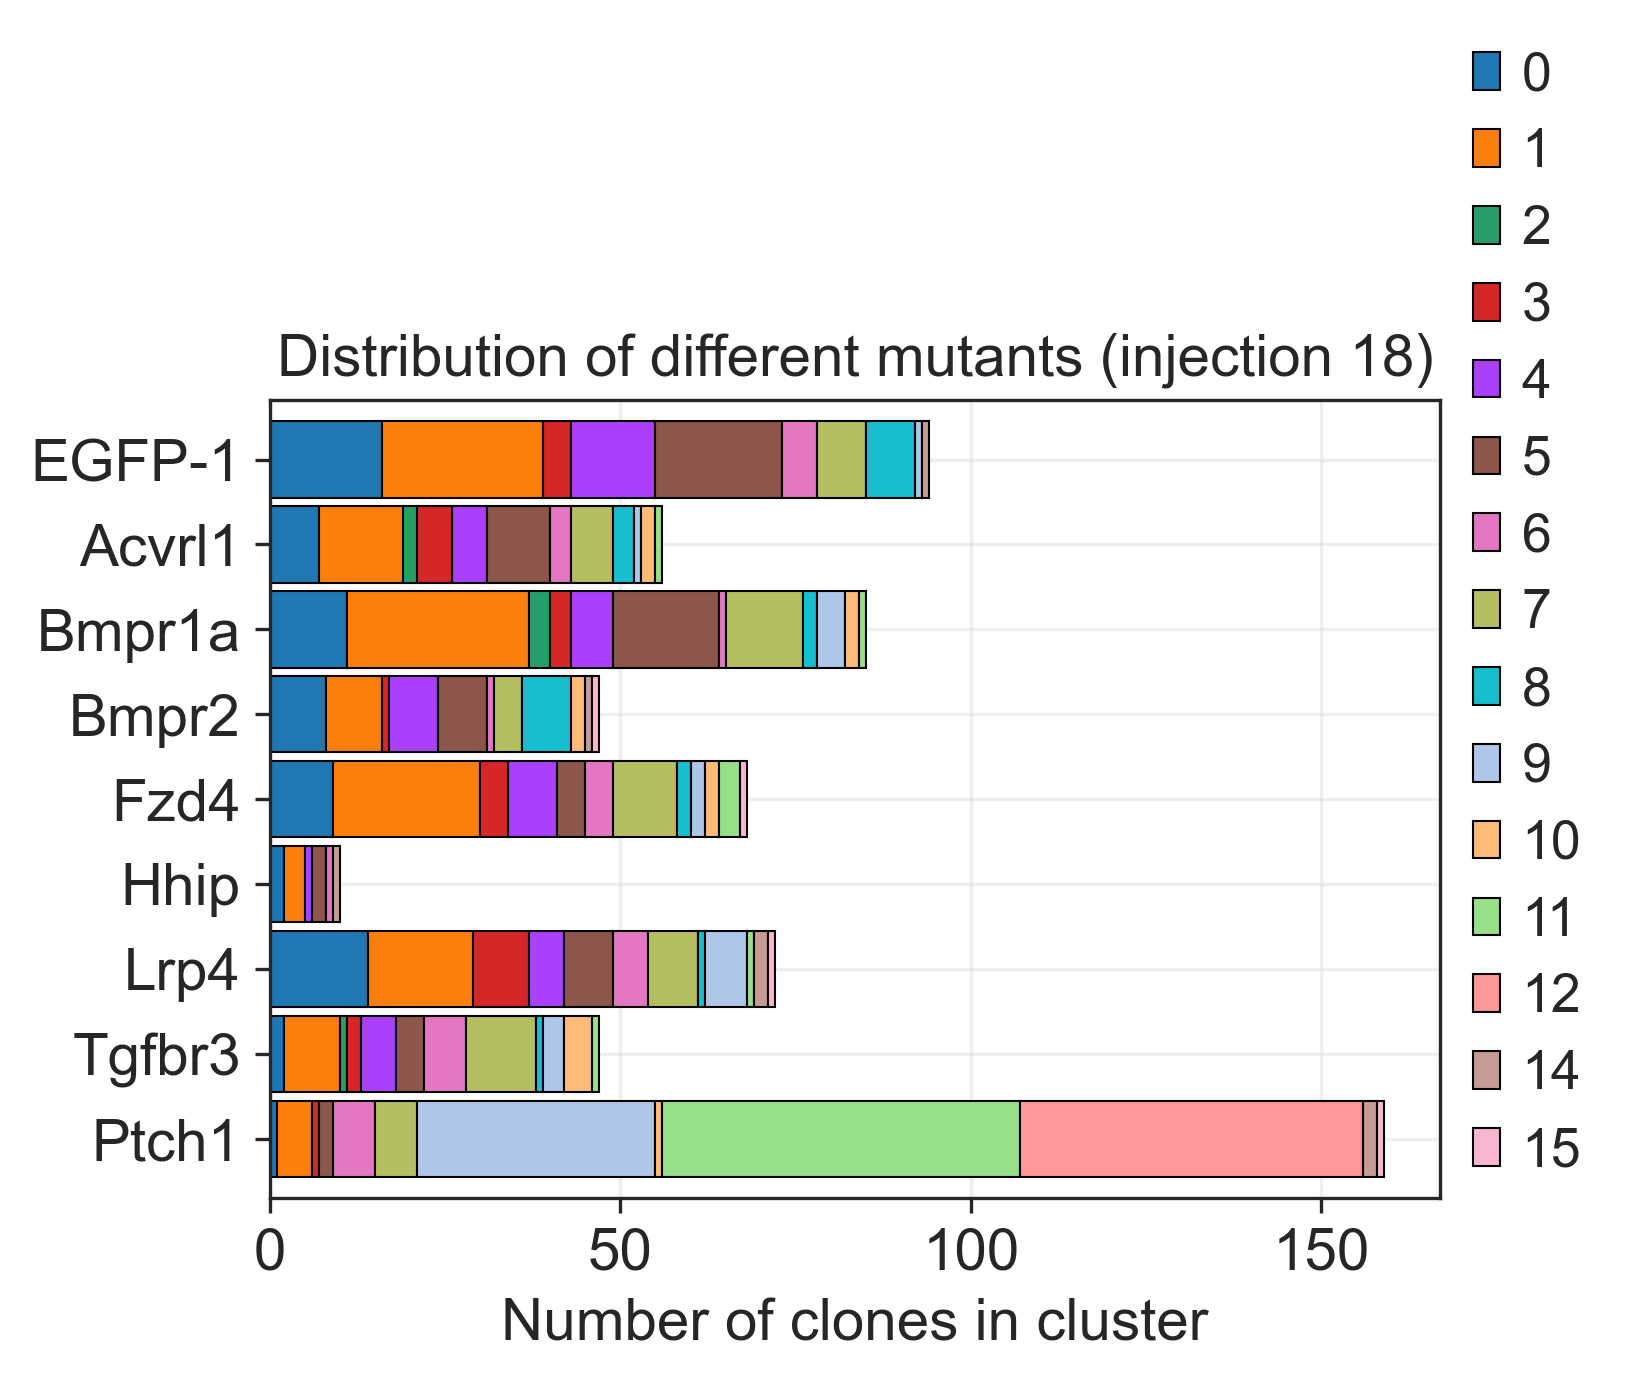

In [106]:
fig, ax = plt.subplots(figsize=(5, 3.5))

ax = df.plot(kind="barh", stacked=True, width=0.9, edgecolor="black", linewidth=0.5,
             color=leiden_colors, alpha=1, ax=ax)

ax.legend(loc=(1.01, 0), edgecolor="white")
ax.set_ylabel("")
ax.set_xlabel("Number of clones in cluster")
ax.set_title("Distribution of different mutants (injection 18)")
ax.grid(alpha=0.3)

#plt.savefig("figures/perturb_barplot_trunk.pdf", bbox_inches="tight")

In [107]:
clones.obs["injection"] = pd.Series(clones.obs_names).apply(lambda x: x.split(":")[1]).values
clones_subset = clones[clones.obs.injection == "injection18"].copy()
clones_subset = clones_subset[~clones_subset.obs.perturbation.isin(["NA", "multi_gRNA", "uncertain"])]
leiden_colors = dict(zip(clones.obs.leiden_1.cat.categories, clones.uns["leiden_1_colors"]))

df = clones_subset.obs.groupby(["leiden_1", "perturbation"]).size().unstack()
df = (df / df.sum(axis=0)).T
df = df.loc[["EGFP-1", "Acvrl1", "Bmpr1a", "Bmpr2", "Fzd4", "Hhip", "Lrp4", "Tgfbr3", "Ptch1"][::-1]]

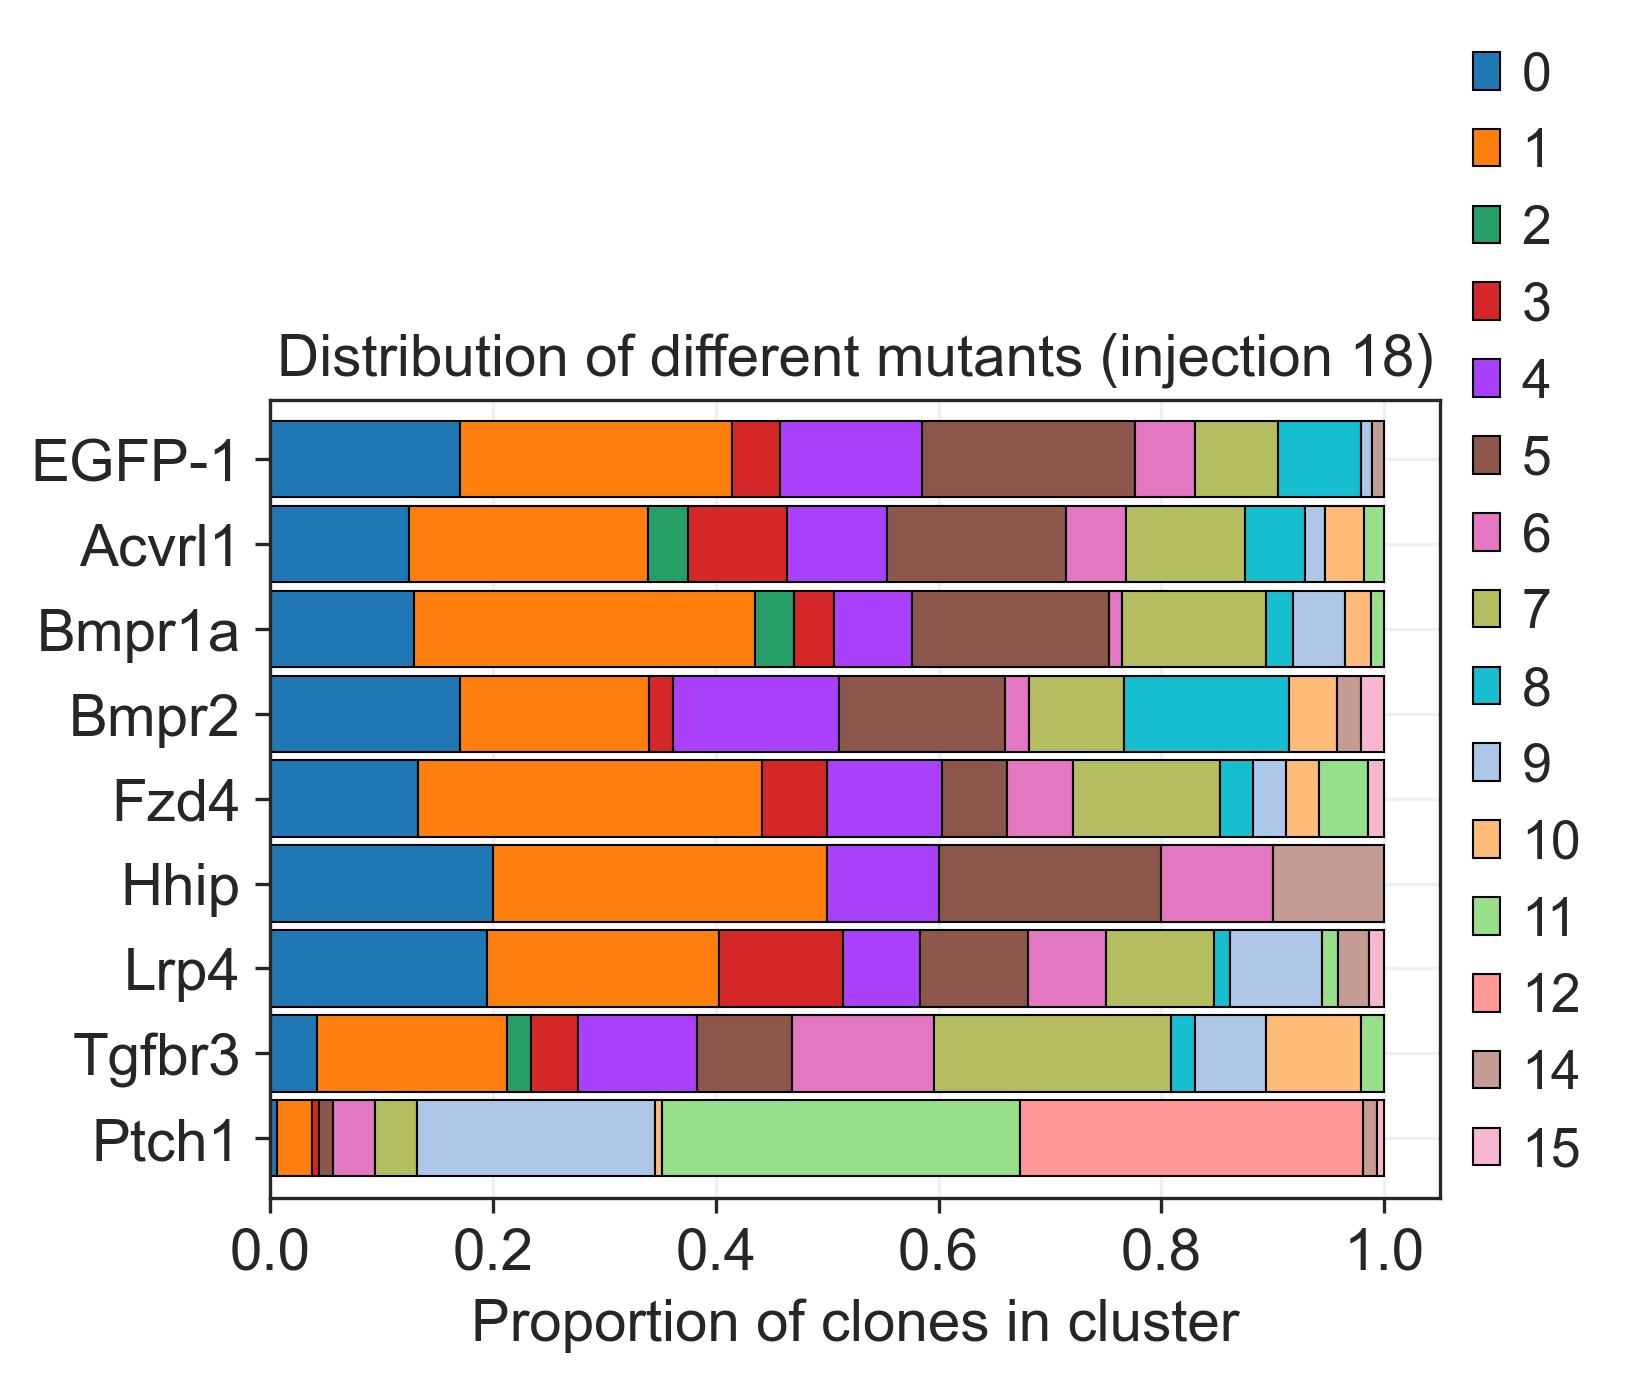

In [108]:
fig, ax = plt.subplots(figsize=(5, 3.5))

ax = df.plot(kind="barh", stacked=True, width=0.9, edgecolor="black", linewidth=0.5,
             color=leiden_colors, alpha=1, ax=ax)

ax.legend(loc=(1.01, 0), edgecolor="white")
ax.set_ylabel("")
ax.set_xlabel("Proportion of clones in cluster")
ax.set_title("Distribution of different mutants (injection 18)")
ax.grid(alpha=0.3)

plt.savefig("figures/perturb_barplot_trunk.pdf", bbox_inches="tight")

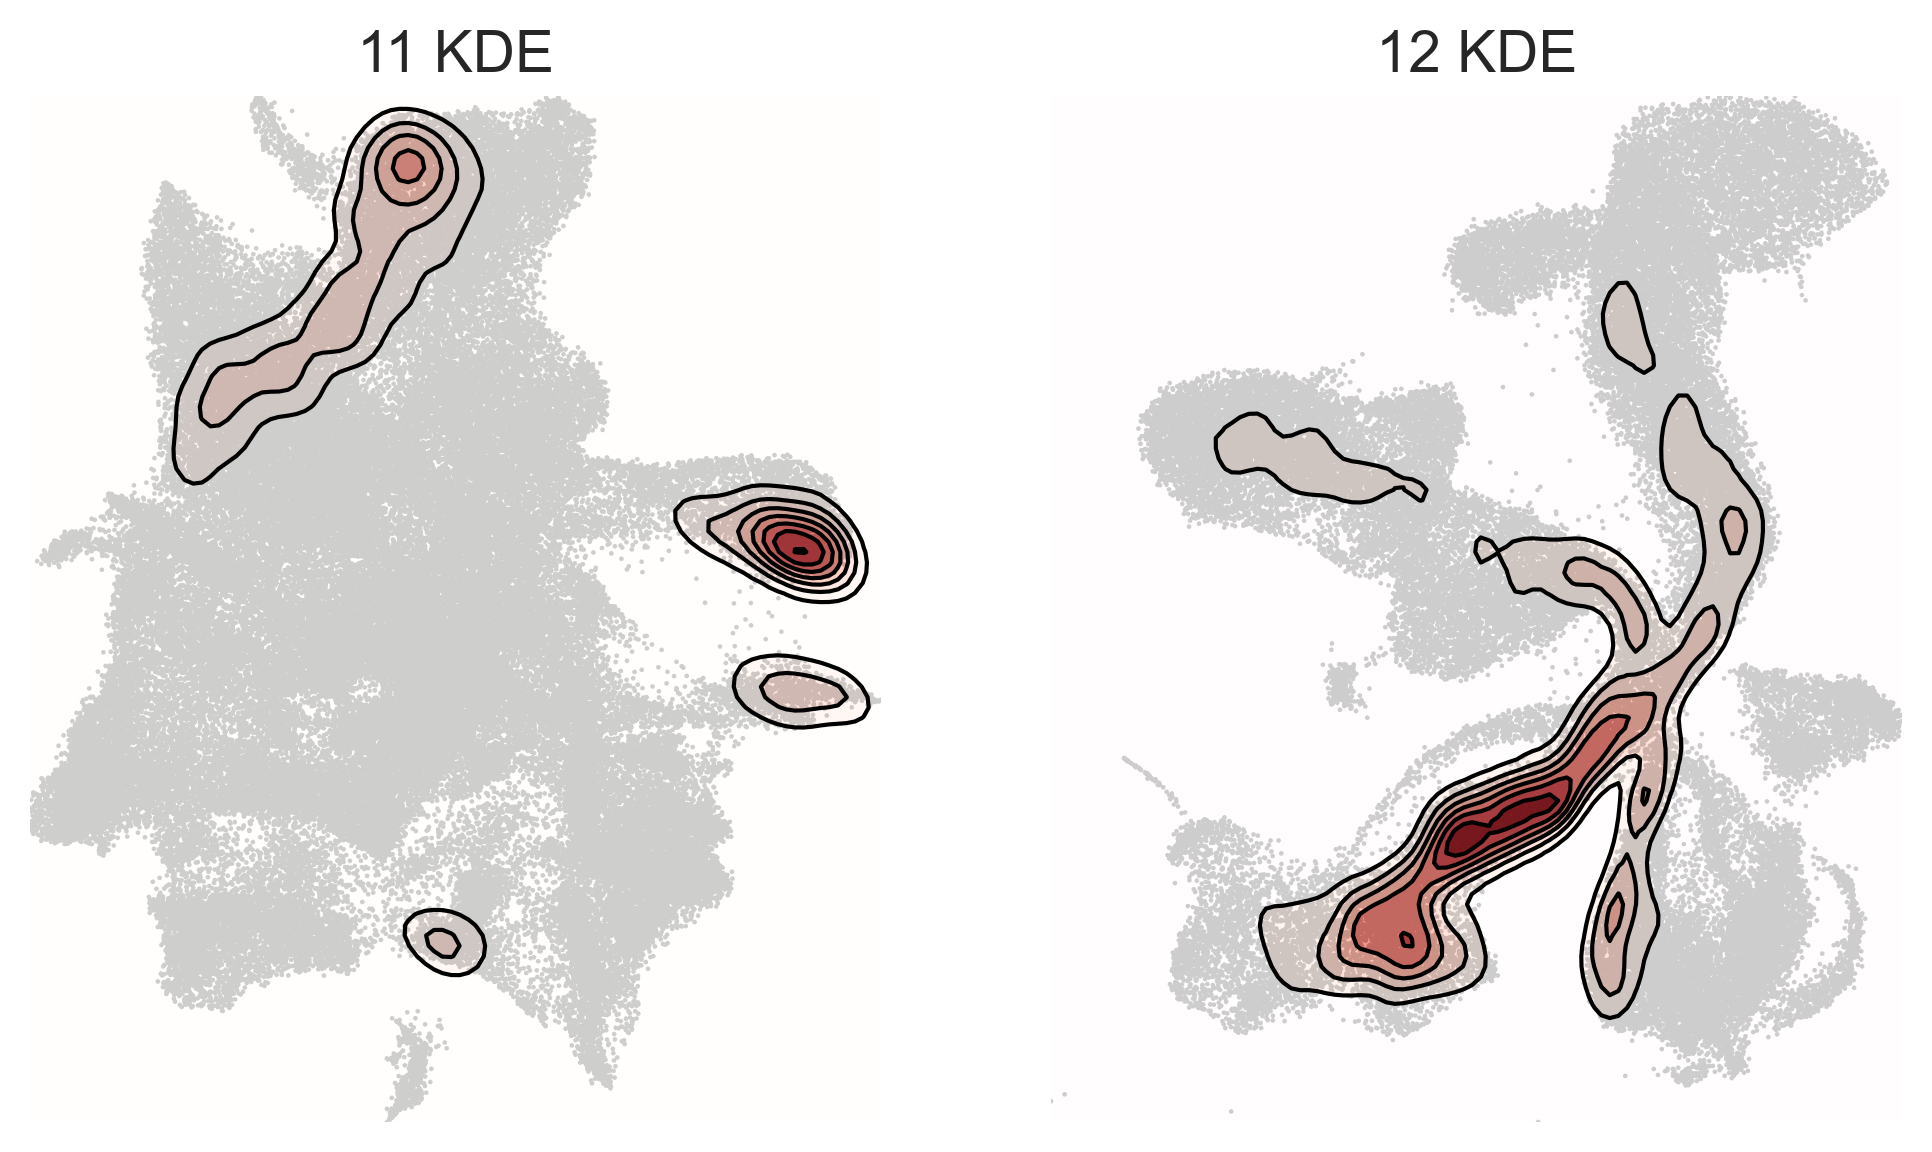

In [98]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4.5))

sl.pl.kde(adata_m, groupby="clones_clusters_1", group="11", ax=axes[0])
sl.pl.kde(adata_n, groupby="clones_clusters_1", group="12", ax=axes[1])

plt.savefig("figures/KDE_Ptch1.pdf", bbox_inches="tight")